In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data0 = pd.read_csv('./data/训练数据.csv')
data0

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [4]:
data0 = data0.iloc[1949:][['date']]
data0

,date
1949,2022-08-10
1950,2022-08-11
1951,2022-08-12
1952,2022-08-15
1953,2022-08-16
...,...
2430,2024-08-05
2431,2024-08-06
2432,2024-08-07
2433,2024-08-08


In [5]:
data0.reset_index(drop = True,inplace = True)
data0

,date
0,2022-08-10
1,2022-08-11
2,2022-08-12
3,2022-08-15
4,2022-08-16
...,...
481,2024-08-05
482,2024-08-06
483,2024-08-07
484,2024-08-08


In [6]:
data = pd.read_csv('./data/LSTM+修正论坛情绪值-预测值.csv')

In [7]:
data

,truth,pred,pred.1,pred.2,pred.3,pred.4
0,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...
481,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755


In [8]:
data['LSTM+IS+S'] = (data['pred'] + data['pred.1'] + data['pred.2'] +  data['pred.3'] + data['pred.4'])/5

In [9]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
0,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
1,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
3,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
4,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
482,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
483,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638
484,2024-08-08,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755,6.307224


In [10]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [11]:
data.index = data.date
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
2022-08-11,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2022-08-12,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
2022-08-15,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
2022-08-16,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
2024-08-06,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
2024-08-07,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638


In [12]:
data['truth'] = np.exp(data['truth'])
data['LSTM+IS+S'] = np.exp(data['LSTM+IS+S'])

In [13]:
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,391.18,5.961126,5.968853,5.963826,5.963461,5.961047,389.032341
2022-08-11,2022-08-11,389.56,5.965225,5.970915,5.965611,5.967664,5.963671,390.183523
2022-08-12,2022-08-12,391.22,5.957880,5.968340,5.960678,5.961311,5.960695,388.301026
2022-08-15,2022-08-15,392.00,5.964905,5.969045,5.965706,5.964025,5.960737,389.507695
2022-08-16,2022-08-16,391.52,5.975966,5.978442,5.976543,5.971910,5.975124,393.703040
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,6.314339,6.321615,6.317025,6.316805,6.313438,553.711814
2024-08-06,2024-08-06,554.18,6.312823,6.319193,6.314431,6.314431,6.311578,552.520833
2024-08-07,2024-08-07,556.06,6.309450,6.314950,6.310256,6.310470,6.308064,550.395890


In [14]:
data = data[['truth','LSTM+IS+S']]
data

,truth,LSTM+IS+S
date,,
2022-08-10,391.18,389.032341
2022-08-11,389.56,390.183523
2022-08-12,391.22,388.301026
2022-08-15,392.00,389.507695
2022-08-16,391.52,393.703040
...,...,...
2024-08-05,559.94,553.711814
2024-08-06,554.18,552.520833
2024-08-07,556.06,550.395890


In [15]:
data1 = pd.read_csv('./data/DTR+修正论坛情绪值-预测值.csv')
data1

,truth,pred
0,5.969168,5.962808
1,5.965018,5.970394
2,5.969270,5.974827
3,5.971262,5.977315
4,5.970037,5.965685
...,...,...
481,6.327830,6.079796
482,6.317490,6.079796
483,6.320876,6.079796
484,6.320948,6.079796


In [16]:
data1 = pd.concat([data0, data1], axis=1)
data1

,date,truth,pred
0,2022-08-10,5.969168,5.962808
1,2022-08-11,5.965018,5.970394
2,2022-08-12,5.969270,5.974827
3,2022-08-15,5.971262,5.977315
4,2022-08-16,5.970037,5.965685
...,...,...,...
481,2024-08-05,6.327830,6.079796
482,2024-08-06,6.317490,6.079796
483,2024-08-07,6.320876,6.079796
484,2024-08-08,6.320948,6.079796


In [17]:
data1['DTR'] = data1['pred']

In [18]:
data1['DTR'] = np.exp(data1['DTR'])

In [19]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1.index = data1.date
data1= data1[['DTR']]
data1

,DTR
date,
2022-08-10,388.70
2022-08-11,391.66
2022-08-12,393.40
2022-08-15,394.38
2022-08-16,389.82
...,...
2024-08-05,436.94
2024-08-06,436.94
2024-08-07,436.94


In [20]:
data = pd.concat([data, data1], axis=1)
data

,truth,LSTM+IS+S,DTR
date,,,
2022-08-10,391.18,389.032341,388.70
2022-08-11,389.56,390.183523,391.66
2022-08-12,391.22,388.301026,393.40
2022-08-15,392.00,389.507695,394.38
2022-08-16,391.52,393.703040,389.82
...,...,...,...
2024-08-05,559.94,553.711814,436.94
2024-08-06,554.18,552.520833,436.94
2024-08-07,556.06,550.395890,436.94


In [21]:
data2 = pd.read_csv('./data/SVR+修正论坛情绪值-预测值.csv')

In [22]:
data2 = pd.concat([data0, data2], axis=1)
data2

,date,truth,pred
0,2022-08-10,5.969168,5.891172
1,2022-08-11,5.965018,5.899934
2,2022-08-12,5.969270,5.896425
3,2022-08-15,5.971262,5.900077
4,2022-08-16,5.970037,5.907269
...,...,...,...
481,2024-08-05,6.327830,6.188790
482,2024-08-06,6.317490,6.188247
483,2024-08-07,6.320876,6.186082
484,2024-08-08,6.320948,6.183533


In [23]:
data2['SVR'] = data2['pred']

In [24]:
data2['SVR'] = np.exp(data2['SVR'])

In [25]:
data2['date'] = pd.to_datetime(data2['date'], format = '%Y-%m-%d')
data2.index = data2.date
data2 = data2[['SVR']]
data2

,SVR
date,
2022-08-10,361.829254
2022-08-11,365.013316
2022-08-12,363.734666
2022-08-15,365.065673
2022-08-16,367.700417
...,...
2024-08-05,487.256188
2024-08-06,486.991836
2024-08-07,485.938366


In [26]:
data = pd.concat([data, data2], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR
date,,,,
2022-08-10,391.18,389.032341,388.70,361.829254
2022-08-11,389.56,390.183523,391.66,365.013316
2022-08-12,391.22,388.301026,393.40,363.734666
2022-08-15,392.00,389.507695,394.38,365.065673
2022-08-16,391.52,393.703040,389.82,367.700417
...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188
2024-08-06,554.18,552.520833,436.94,486.991836
2024-08-07,556.06,550.395890,436.94,485.938366


In [27]:
data3 = pd.read_csv('./data/RFR+修正论坛情绪值-预测值.csv')
data3 = pd.concat([data0, data3], axis=1)
data3

,date,truth,pred
0,2022-08-10,5.969168,5.965153
1,2022-08-11,5.965018,5.965487
2,2022-08-12,5.969270,5.965710
3,2022-08-15,5.971262,5.968815
4,2022-08-16,5.970037,5.970003
...,...,...,...
481,2024-08-05,6.327830,6.079979
482,2024-08-06,6.317490,6.079979
483,2024-08-07,6.320876,6.079979
484,2024-08-08,6.320948,6.079979


In [28]:
data3['RFR'] = data3['pred']
data3['RFR'] = np.exp(data3['RFR'])
data3['date'] = pd.to_datetime(data3['date'], format = '%Y-%m-%d')
data3.index = data3.date
data3 = data3[['RFR']]
data3

,RFR
date,
2022-08-10,389.612703
2022-08-11,389.742702
2022-08-12,389.829567
2022-08-15,391.042001
2022-08-16,391.506981
...,...
2024-08-05,437.019913
2024-08-06,437.019913
2024-08-07,437.019913


In [29]:
data = pd.concat([data, data3], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR,RFR
date,,,,,
2022-08-10,391.18,389.032341,388.70,361.829254,389.612703
2022-08-11,389.56,390.183523,391.66,365.013316,389.742702
2022-08-12,391.22,388.301026,393.40,363.734666,389.829567
2022-08-15,392.00,389.507695,394.38,365.065673,391.042001
2022-08-16,391.52,393.703040,389.82,367.700417,391.506981
...,...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188,437.019913
2024-08-06,554.18,552.520833,436.94,486.991836,437.019913
2024-08-07,556.06,550.395890,436.94,485.938366,437.019913


In [30]:
data4 = pd.read_csv('./data/XGBoost+修正论坛情绪值-预测值.csv')
data4 = pd.concat([data0, data4], axis=1)
data4

,date,truth,pred
0,2022-08-10,5.969168,5.957285
1,2022-08-11,5.965018,5.961165
2,2022-08-12,5.969270,5.962797
3,2022-08-15,5.971262,5.963575
4,2022-08-16,5.970037,5.969542
...,...,...,...
481,2024-08-05,6.327830,6.081054
482,2024-08-06,6.317490,6.081054
483,2024-08-07,6.320876,6.081054
484,2024-08-08,6.320948,6.081054


In [31]:
data4['XGBoost'] = data4['pred']
data4['XGBoost'] = np.exp(data4['XGBoost'])
data4['date'] = pd.to_datetime(data4['date'], format = '%Y-%m-%d')
data4.index = data4.date
data4 = data4[['XGBoost']]
data4

,XGBoost
date,
2022-08-10,386.559190
2022-08-11,388.062108
2022-08-12,388.695787
2022-08-15,388.998310
2022-08-16,391.326402
...,...
2024-08-05,437.489935
2024-08-06,437.489935
2024-08-07,437.489935


In [32]:
data = pd.concat([data, data4], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR,RFR,XGBoost
date,,,,,,
2022-08-10,391.18,389.032341,388.70,361.829254,389.612703,386.559190
2022-08-11,389.56,390.183523,391.66,365.013316,389.742702,388.062108
2022-08-12,391.22,388.301026,393.40,363.734666,389.829567,388.695787
2022-08-15,392.00,389.507695,394.38,365.065673,391.042001,388.998310
2022-08-16,391.52,393.703040,389.82,367.700417,391.506981,391.326402
...,...,...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188,437.019913,437.489935
2024-08-06,554.18,552.520833,436.94,486.991836,437.019913,437.489935
2024-08-07,556.06,550.395890,436.94,485.938366,437.019913,437.489935


In [33]:
data5 = pd.read_csv('./data/RNN+修正论坛情绪值-预测值.csv')
data5 = pd.concat([data0, data5], axis=1)
data5

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.970992,5.957479,5.957102,5.965850,6.008008
1,2022-08-11,5.965018,5.977255,5.961569,5.959309,5.969900,6.008146
2,2022-08-12,5.969270,5.973446,5.957345,5.950858,5.973712,6.001841
3,2022-08-15,5.971262,5.976753,5.963549,5.944873,5.974957,6.003188
4,2022-08-16,5.970037,5.977922,5.963336,5.951421,5.976989,6.003555
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.319801,6.316473,6.305201,6.290851,6.330508
482,2024-08-06,6.317490,6.309287,6.302069,6.292864,6.281470,6.318781
483,2024-08-07,6.320876,6.298260,6.289360,6.280783,6.271030,6.307909
484,2024-08-08,6.320948,6.295536,6.287542,6.278304,6.267502,6.306105


In [34]:
data5['RNN'] = (data5['pred'] + data5['pred.1'] + data5['pred.2'] +  data5['pred.3'] + data5['pred.4'])/5
data5['RNN'] = np.exp(data5['RNN'])
data5['date'] = pd.to_datetime(data5['date'], format = '%Y-%m-%d')
data5.index = data5.date
data5 = data5[['RNN']]
data5

,RNN
date,
2022-08-10,392.244959
2022-08-11,393.560837
2022-08-12,392.070033
2022-08-15,392.549985
2022-08-16,393.328374
...,...
2024-08-05,551.458585
2024-08-06,545.059117
2024-08-07,538.866694


In [35]:
data = pd.concat([data, data5], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR,RFR,XGBoost,RNN
date,,,,,,,
2022-08-10,391.18,389.032341,388.70,361.829254,389.612703,386.559190,392.244959
2022-08-11,389.56,390.183523,391.66,365.013316,389.742702,388.062108,393.560837
2022-08-12,391.22,388.301026,393.40,363.734666,389.829567,388.695787,392.070033
2022-08-15,392.00,389.507695,394.38,365.065673,391.042001,388.998310,392.549985
2022-08-16,391.52,393.703040,389.82,367.700417,391.506981,391.326402,393.328374
...,...,...,...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188,437.019913,437.489935,551.458585
2024-08-06,554.18,552.520833,436.94,486.991836,437.019913,437.489935,545.059117
2024-08-07,556.06,550.395890,436.94,485.938366,437.019913,437.489935,538.866694


In [36]:
data6 = pd.read_csv('./data/GRU+修正论坛情绪值-预测值.csv')
data6 = pd.concat([data0, data6], axis=1)
data6

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.916552,5.935447,5.937622,5.927688,5.933182
1,2022-08-11,5.965018,5.918329,5.936144,5.939870,5.925626,5.935574
2,2022-08-12,5.969270,5.921741,5.936267,5.935858,5.932128,5.936950
3,2022-08-15,5.971262,5.926322,5.941406,5.940068,5.937083,5.941927
4,2022-08-16,5.970037,5.928778,5.942855,5.943005,5.938506,5.943027
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.230998,6.246446,6.245560,6.235337,6.241735
482,2024-08-06,6.317490,6.224530,6.239920,6.239005,6.229327,6.235589
483,2024-08-07,6.320876,6.217187,6.232544,6.231667,6.222264,6.228458
484,2024-08-08,6.320948,6.214165,6.229514,6.228684,6.219174,6.225398


In [37]:
data6['GRU'] = (data6['pred'] + data6['pred.1'] + data6['pred.2'] +  data6['pred.3'] + data6['pred.4'])/5
data6['GRU'] = np.exp(data6['GRU'])
data6['date'] = pd.to_datetime(data6['date'], format = '%Y-%m-%d')
data6.index = data6.date
data6 = data6[['GRU']]
data6

,GRU
date,
2022-08-10,376.191439
2022-08-11,376.571788
2022-08-12,377.129602
2022-08-15,378.933641
2022-08-16,379.644049
...,...
2024-08-05,512.866296
2024-08-06,509.624439
2024-08-07,505.942891


In [38]:
data = pd.concat([data, data6], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR,RFR,XGBoost,RNN,GRU
date,,,,,,,,
2022-08-10,391.18,389.032341,388.70,361.829254,389.612703,386.559190,392.244959,376.191439
2022-08-11,389.56,390.183523,391.66,365.013316,389.742702,388.062108,393.560837,376.571788
2022-08-12,391.22,388.301026,393.40,363.734666,389.829567,388.695787,392.070033,377.129602
2022-08-15,392.00,389.507695,394.38,365.065673,391.042001,388.998310,392.549985,378.933641
2022-08-16,391.52,393.703040,389.82,367.700417,391.506981,391.326402,393.328374,379.644049
...,...,...,...,...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188,437.019913,437.489935,551.458585,512.866296
2024-08-06,554.18,552.520833,436.94,486.991836,437.019913,437.489935,545.059117,509.624439
2024-08-07,556.06,550.395890,436.94,485.938366,437.019913,437.489935,538.866694,505.942891


In [39]:
data7 = pd.read_csv('./data/BiLSTM+修正论坛情绪值-预测值.csv')
data7 = pd.concat([data0, data7], axis=1)
data7

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.968034,5.970929,5.954318,5.946622,5.956751
1,2022-08-11,5.965018,5.971435,5.976609,5.959818,5.952207,5.960796
2,2022-08-12,5.969270,5.968447,5.972254,5.956700,5.950942,5.960569
3,2022-08-15,5.971262,5.965992,5.970792,5.957620,5.951882,5.958950
4,2022-08-16,5.970037,5.968760,5.974850,5.961334,5.957552,5.962603
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.319859,6.327881,6.309884,6.307970,6.316846
482,2024-08-06,6.317490,6.318925,6.326747,6.309055,6.307044,6.315754
483,2024-08-07,6.320876,6.316437,6.324027,6.306490,6.304430,6.313126
484,2024-08-08,6.320948,6.313576,6.321074,6.303493,6.301436,6.310257


In [40]:
data7['BiLSTM'] = (data7['pred'] + data7['pred.1'] + data7['pred.2'] +  data7['pred.3'] + data7['pred.4'])/5
data7['BiLSTM'] = np.exp(data7['BiLSTM'])
data7['date'] = pd.to_datetime(data7['date'], format = '%Y-%m-%d')
data7.index = data7.date
data7 = data7[['BiLSTM']]
data7

,BiLSTM
date,
2022-08-10,387.350822
2022-08-11,389.231032
2022-08-12,388.301640
2022-08-15,388.016149
2022-08-16,389.560734
...,...
2024-08-05,553.625109
2024-08-06,553.081385
2024-08-07,551.643465


In [41]:
data = pd.concat([data, data7], axis=1)
data

,truth,LSTM+IS+S,DTR,SVR,RFR,XGBoost,RNN,GRU,BiLSTM
date,,,,,,,,,
2022-08-10,391.18,389.032341,388.70,361.829254,389.612703,386.559190,392.244959,376.191439,387.350822
2022-08-11,389.56,390.183523,391.66,365.013316,389.742702,388.062108,393.560837,376.571788,389.231032
2022-08-12,391.22,388.301026,393.40,363.734666,389.829567,388.695787,392.070033,377.129602,388.301640
2022-08-15,392.00,389.507695,394.38,365.065673,391.042001,388.998310,392.549985,378.933641,388.016149
2022-08-16,391.52,393.703040,389.82,367.700417,391.506981,391.326402,393.328374,379.644049,389.560734
...,...,...,...,...,...,...,...,...,...
2024-08-05,559.94,553.711814,436.94,487.256188,437.019913,437.489935,551.458585,512.866296,553.625109
2024-08-06,554.18,552.520833,436.94,486.991836,437.019913,437.489935,545.059117,509.624439,553.081385
2024-08-07,556.06,550.395890,436.94,485.938366,437.019913,437.489935,538.866694,505.942891,551.643465


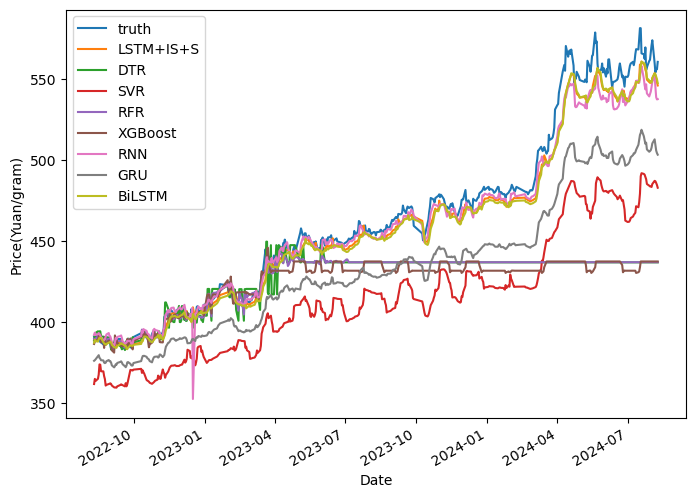

In [42]:
ax = data.plot(figsize = (8,6))
ax.set_ylabel('Price(Yuan/gram)')
ax.set_xlabel('Date')
plt.show()